# Data Exploration
Ziel ist es eine Übersicht über die Daten zu bekommen und diese besser zu verstehen.
Dazu wird zuerst versucht diese komplett einzulesen und die Größe des gesamten Datensets zurückzugeben sowie ein paar Übersichten

In [13]:
import os

import pandas as pd
import pandas_profiling as pd_profil

import matplotlib.pyplot as plt
import seaborn as sns

import functions as fu

from datetime import date

c_fold = fu.get_folder()
p_fold = c_fold + '\data\Prepared'

# Daten einlesen und zusammenführen

In [6]:
df = fu.csv_einlesen(p_fold)

Einlesen von  prepared_RW1.csv  erfolgreich
Einlesen von  prepared_RW10.csv  erfolgreich
Einlesen von  prepared_RW11.csv  erfolgreich
Einlesen von  prepared_RW12.csv  erfolgreich
Einlesen von  prepared_RW13.csv  erfolgreich
Einlesen von  prepared_RW14.csv  erfolgreich
Einlesen von  prepared_RW15.csv  erfolgreich
Einlesen von  prepared_RW16.csv  erfolgreich
Einlesen von  prepared_RW17.csv  erfolgreich
Einlesen von  prepared_RW18.csv  erfolgreich
Einlesen von  prepared_RW19.csv  erfolgreich
Einlesen von  prepared_RW2.csv  erfolgreich
Einlesen von  prepared_RW20.csv  erfolgreich
Einlesen von  prepared_RW21.csv  erfolgreich
Einlesen von  prepared_RW22.csv  erfolgreich
Einlesen von  prepared_RW23.csv  erfolgreich
Einlesen von  prepared_RW24.csv  erfolgreich
Einlesen von  prepared_RW25.csv  erfolgreich
Einlesen von  prepared_RW26.csv  erfolgreich
Einlesen von  prepared_RW27.csv  erfolgreich
Einlesen von  prepared_RW28.csv  erfolgreich
Einlesen von  prepared_RW3.csv  erfolgreich
Einlesen von 

In [7]:
df.shape

(77700820, 11)

In [8]:
df.head()

,batteryname,zyklus,step,comment,type,time,relativeTime,voltage,current,temperature,date
0,RW1,0,0,low current discharge at 0.04A,D,1538.07,0.15,4.196,0.018,18.37451,30-Dec-2013 15:53:29
1,RW1,0,1,low current discharge at 0.04A,D,1548.07,10.15,4.192,0.040,18.37451,30-Dec-2013 15:53:29
2,RW1,0,2,low current discharge at 0.04A,D,1558.07,20.15,4.191,0.040,18.37451,30-Dec-2013 15:53:29
3,RW1,0,3,low current discharge at 0.04A,D,1568.07,30.15,4.191,0.040,18.37451,30-Dec-2013 15:53:29
4,RW1,0,4,low current discharge at 0.04A,D,1578.07,40.15,4.190,0.040,18.39025,30-Dec-2013 15:53:29


In [9]:
df.describe

<bound method NDFrame.describe of          batteryname  zyklus  step                         comment type  \
0                RW1       0     0  low current discharge at 0.04A    D   
1                RW1       0     1  low current discharge at 0.04A    D   
2                RW1       0     2  low current discharge at 0.04A    D   
3                RW1       0     3  low current discharge at 0.04A    D   
4                RW1       0     4  low current discharge at 0.04A    D   
...              ...     ...   ...                             ...  ...   
77700815         RW9  113577   716   rest post reference discharge    R   
77700816         RW9  113577   717   rest post reference discharge    R   
77700817         RW9  113577   718   rest post reference discharge    R   
77700818         RW9  113577   719   rest post reference discharge    R   
77700819         RW9  113577   720   rest post reference discharge    R   

                 time  relativeTime  voltage  current  temperatur

In [19]:
pd_profil.ProfileReport(df, minimal)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

exception calling callback for <Future at 0x1c98090d670 state=finished raised MemoryError>
Traceback (most recent call last):
  File "C:\Users\danie\OneDrive\Dokumente\batfailpred\lib\site-packages\joblib\parallel.py", line 820, in dispatch_one_batch
    tasks = self._ready_batches.get(block=False)
  File "c:\programdata\anaconda3\lib\queue.py", line 167, in get
    raise Empty
_queue.Empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\danie\OneDrive\Dokumente\batfailpred\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\danie\OneDrive\Dokumente\batfailpred\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\danie\OneDrive\Dokumente\batfailpred\lib\site-packages\joblib\parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users

MemoryError: Unable to allocate 593. MiB for an array with shape (77700820,) and data type int64

In [7]:
profile = pd_profil.ProfileReport(df, minimal=True)

datum = date.today().strftime("%Y_%m_%d")

profile.to_file(f"{c_fold}\\models\\explorationreport_{datum}.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlationswerte analysieren

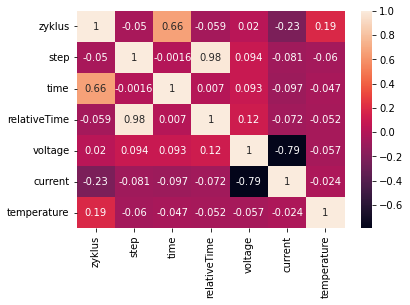

In [16]:
%matplotlib inline

data = df

corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.draw()